# Data Visualization using matplotlib
## Problem Statement:
Analyzing Air Quality Index (AQI) Trends in a City
## Dataset: 
"City_Air_Quality.csv"
## Description:
The dataset contains information about air quality measurements in a specific city over a period of time. It includes attributes such as date, time, pollutant levels (e.g., PM2.5,
PM10, CO), and the Air Quality Index (AQI) values. The goal is to use the matplotlib library
to create visualizations that effectively represent the AQI trends and patterns for different
pollutants in the city.
## Tasks to Perform:
1. Import the "City_Air_Quality.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for visualizing AQI trends, such as date, pollutant levels,
and AQI values.
4. Create line plots or time series plots to visualize the overall AQI trend over time.
5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.
6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.
7. Create box plots or violin plots to analyze the distribution of AQI values for different
pollutant categories.
8. Use scatter plots or bubble charts to explore the relationship between AQI values and
pollutant levels.
9. Customize the visualizations by adding labels, titles, legends, and appropriate color
schemes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import dataset

In [2]:
df = pd.read_csv("City_Air_Quality.csv")

### 2. Explore dataset

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### 3. Identify relevant variables

In [5]:
# Main ones: Date, PM2.5, PM10, CO, AQI, AQI_Bucket
df['Date'] = pd.to_datetime(df['Date'])

### 4. Handle missing values - impute AQI with median

In [6]:
df['AQI'] = df['AQI'].fillna(df['AQI'].median())

In [7]:
# Also handle missing pollutants (optional: fill with median too)
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
for col in pollutants:
    df[col] = df[col].fillna(df[col].median())

## ---------------------- VISUALIZATIONS ----------------------

### 5. Line plot - overall AQI trend over time

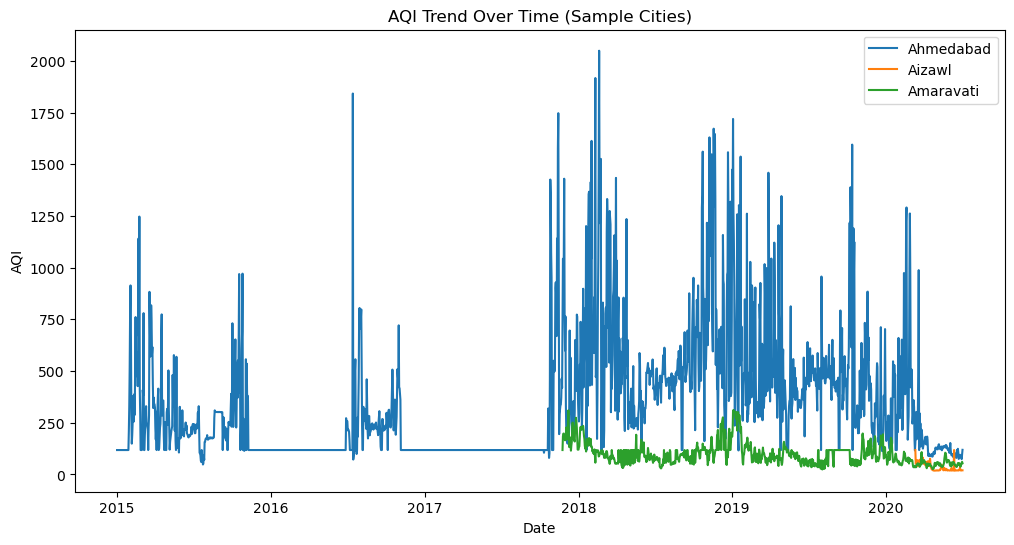

In [8]:
plt.figure(figsize=(12,6))
for city in df['City'].unique()[:3]:  # just first 3 cities to avoid clutter
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['AQI'], label=city)
plt.title("AQI Trend Over Time (Sample Cities)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()

### 6. Line plots for individual pollutants

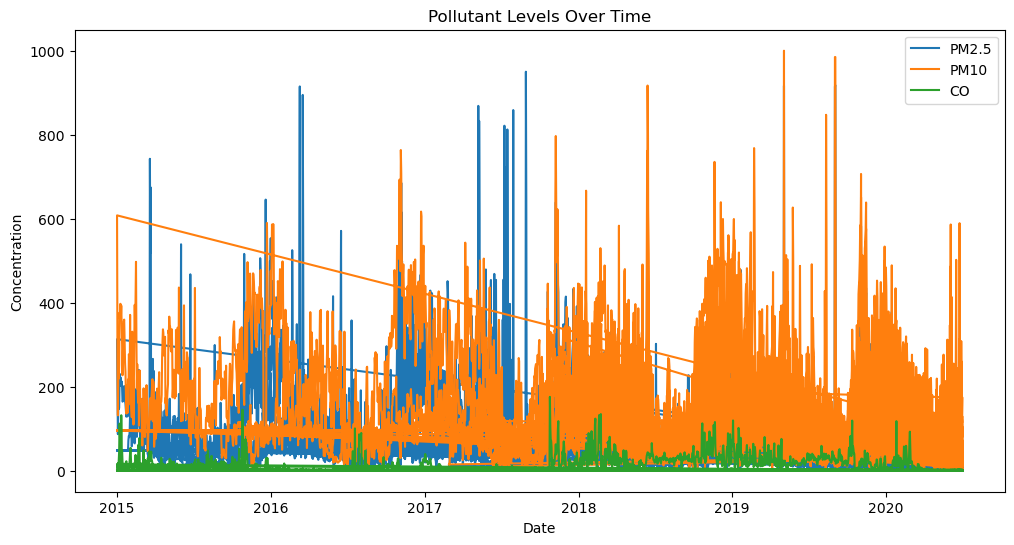

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['PM2.5'], label='PM2.5')
plt.plot(df['Date'], df['PM10'], label='PM10')
plt.plot(df['Date'], df['CO'], label='CO')
plt.title("Pollutant Levels Over Time")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.legend()
plt.show()

### 7. Bar plot - average AQI per city

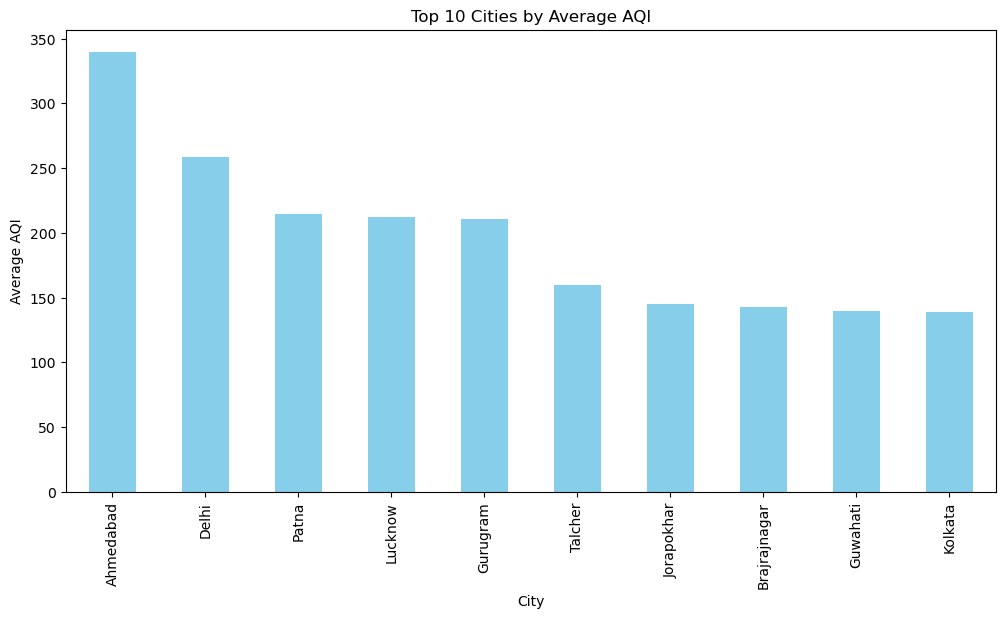

In [10]:
plt.figure(figsize=(12,6))
avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)[:10]
avg_aqi.plot(kind='bar', color='skyblue')
plt.title("Top 10 Cities by Average AQI")
plt.ylabel("Average AQI")
plt.show()

### 8. Box plot - AQI distribution by bucket

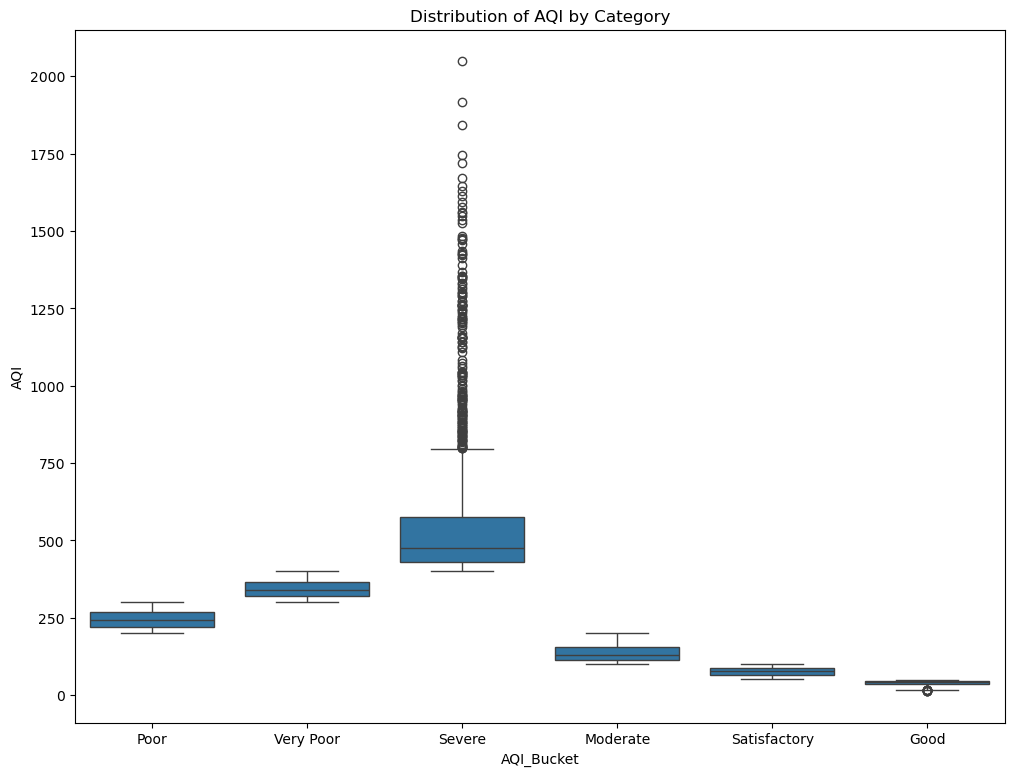

In [11]:
plt.figure(figsize=(12,9))
sns.boxplot(x="AQI_Bucket", y="AQI", data=df)
plt.title("Distribution of AQI by Category")
plt.show()

### 9. Scatter plot - relationship between PM2.5 and AQI

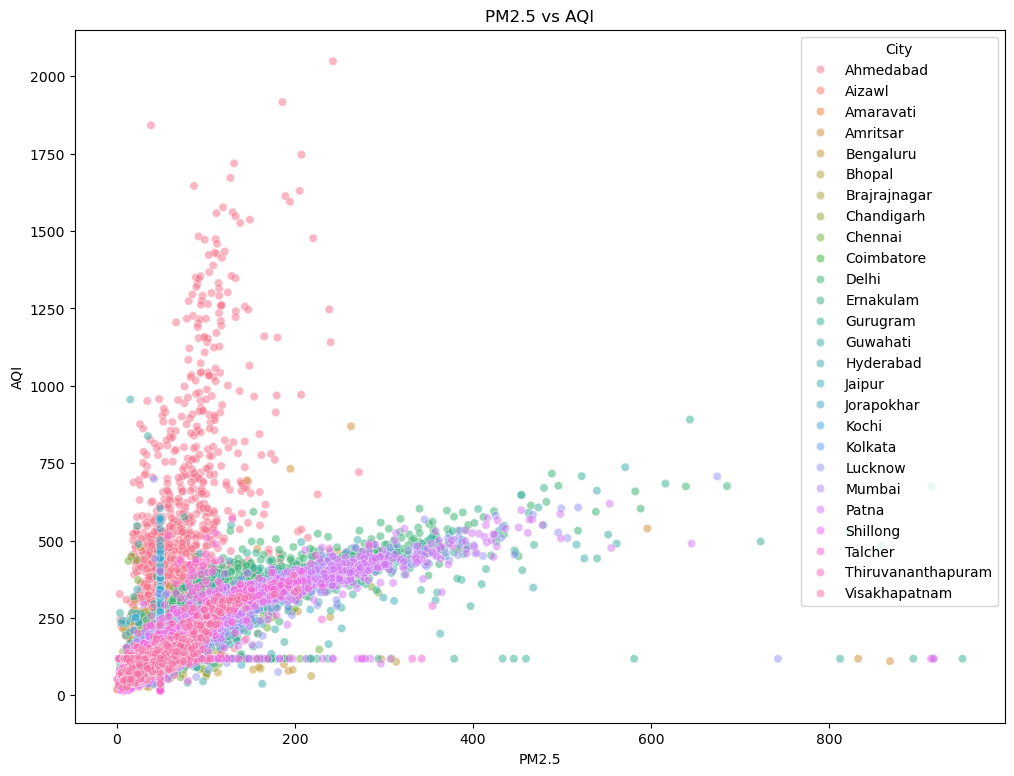

In [12]:
plt.figure(figsize=(12,9))
sns.scatterplot(x="PM2.5", y="AQI", hue="City", data=df, alpha=0.5)
plt.title("PM2.5 vs AQI")
plt.show()

### 10. Heatmap - correlation between pollutants & AQI

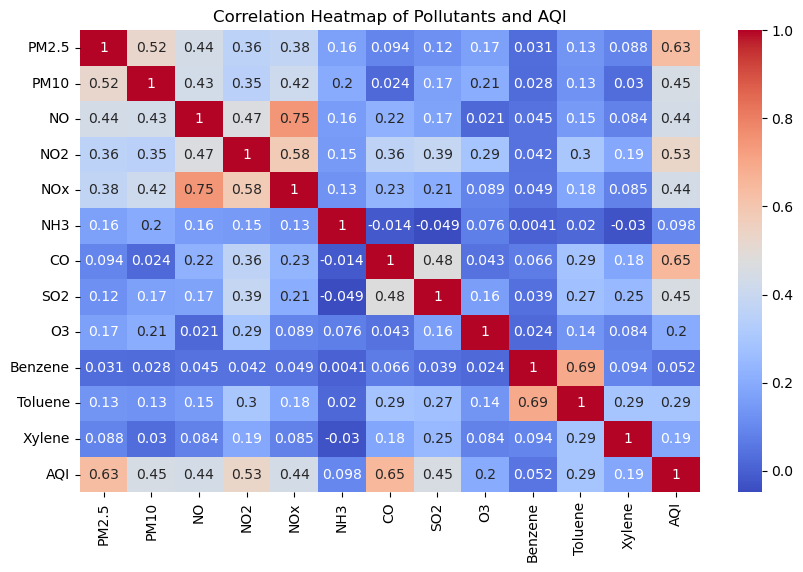

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df[pollutants + ['AQI']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()